In [29]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 2.8 MB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 89.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install scipy

     |████████████████████████████████| 28.8 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./dataset/2016-mlb-homeruns.csv')

df.drop_duplicates()

# Handle missing values
# df = df.fillna(method='ffill')  # Forward fill as an example

df = df.drop(columns=["video"])

In [27]:
# Display basic information about the datasetprint()
df.info()

# # View the first few rows
# df.head()

# # Check for missing values
# df.isnull().sum()

# # Check for duplicate rows
# df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 0 to 5498
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       5497 non-null   object 
 1   title         5497 non-null   object 
 2   ExitVelocity  5497 non-null   float64
 3   HitDistance   5497 non-null   float64
 4   LaunchAngle   5497 non-null   float64
dtypes: float64(3), object(2)
memory usage: 257.7+ KB


In [3]:
# Fill missing values with the column mean
df["ExitVelocity"] = df["ExitVelocity"].fillna(df["ExitVelocity"].mean())
df["HitDistance"] = df["HitDistance"].fillna(df["HitDistance"].mean())
df["LaunchAngle"] = df["LaunchAngle"].fillna(df["LaunchAngle"].mean())
df = df.dropna(subset=["title"])

In [4]:
# Check and convert data types if necessary
df["ExitVelocity"] = pd.to_numeric(df["ExitVelocity"], errors="coerce")
df["HitDistance"] = pd.to_numeric(df["HitDistance"], errors="coerce")
df["LaunchAngle"] = pd.to_numeric(df["LaunchAngle"], errors="coerce")

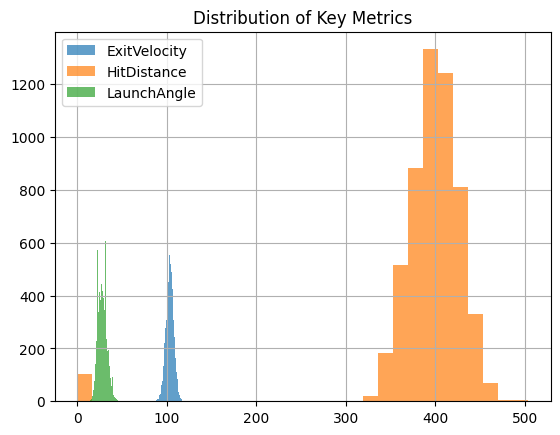

In [5]:
import matplotlib.pyplot as plt

# Plot histograms
df["ExitVelocity"].hist(bins=30, alpha=0.7, label="ExitVelocity")
df["HitDistance"].hist(bins=30, alpha=0.7, label="HitDistance")
df["LaunchAngle"].hist(bins=30, alpha=0.7, label="LaunchAngle")
plt.legend()
plt.title("Distribution of Key Metrics")
plt.show()

In [6]:
from scipy.stats import zscore

# Calculate Z-scores
df['HitDistance_zscore'] = zscore(df['HitDistance'])

# Identify potential outliers
outliers = df[df['HitDistance_zscore'].abs() > 3]
print(outliers.count())

play_id               104
title                 104
ExitVelocity          104
HitDistance           104
LaunchAngle           104
HitDistance_zscore    104
dtype: int64


In [7]:
df.head()

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,HitDistance_zscore
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,John Jaso homers (6) on a fly ball to center f...,102.9,412.0,25.0,0.327006
1,0110e760-5d49-4c53-ad29-e74c787c038d,Evan Longoria homers (34) on a fly ball to lef...,103.1,423.0,31.0,0.509790
2,3b9ecf94-e3fe-4d79-8b33-efe174dfa53e,Marwin Gonzalez homers (13) on a line drive to...,106.6,390.0,22.0,-0.038564
3,bda1cb83-dca9-46b2-aaad-6c1f009cd51c,Eddie Rosario homers (10) on a fly ball to rig...,98.5,368.0,30.0,-0.404133
4,9f87e907-3c4f-4187-8fb0-d6784b3b1f1a,Marcus Semien homers (26) on a fly ball to lef...,106.0,435.0,32.0,0.709192
